# Read in the data

In [60]:
import pandas as pd
import numpy
import re
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

# Read in the surveys

In [61]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0, sort=True)
print(all_survey.shape)
print(d75_survey.shape)

(1646, 1942)
(56, 1773)


# Add selected columns of survey to data dictionary

There are over 1500 columns for each of the surveys. Looking at the columns, we can decide which columns are of importance. The data dictionary available [here](https://data.cityofnewyork.us/Education/2010-2011-NYC-School-Survey/mnz3-dyi8) gives a good idea of which columns may be useful for our analysis.

In [62]:
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

# Look at the data sets

It might be useful to take a look at all the data sets to figure out if they have something in common to merge them.

In [63]:
data.keys()

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey'])

In [64]:
data['ap_2010'].head(2)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s


In [65]:
data['class_size'].head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN


In [66]:
data['demographics'].head(2)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4


In [67]:
data['graduation'].head(2)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%


In [68]:
data['hs_directory'].head(2)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."


In [69]:
data['sat_results'].head(2)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366


In [70]:
data['survey'].head(2)

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4


## Findings

It appears that each of the files has a column for DBN, which stands for 'District Borough Number'. Most files have a column titled DBN. `hs_directory.csv` has a column titled 'dbn', and `class_size.csv` has the DBN split into three columns: CSD, Borough, and School Code. This can be used to obtain a combined data set sorted by DBN.

# Add DBN columns
Some CSD numbers are single and some are double digit. We pad the single digit CSD numbers with a zero so they are all double digit numbers. 

Note that these are all strings, not numeric

In [71]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

# Convert columns to numeric

In [72]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for col in cols:
    data["sat_results"][col] = pd.to_numeric(data["sat_results"][col], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

# Condense datasets

In [73]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

# Convert AP scores to numeric

In [74]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

# Combine the datasets

In [75]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

cols = ["class_size", "demographics", "survey", "hs_directory"]

for col in cols:
    combined = combined.merge(data[col], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


In [76]:
combined.describe()

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,...,grade_span_max,expgrade_span_max,zip,total_students,number_programs,priority08,priority09,priority10,lat,lon
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.0,363.0,363.000000,363.000000,363.000000,363.0,363.0,363.0,363.000000,363.000000
mean,404.119403,419.656716,399.662687,1223.438806,129.028846,197.038462,153.450000,193.870968,14.019284,171.762429,...,12.0,12.0,10724.719008,777.556474,1.834711,0.0,0.0,0.0,40.743533,-73.925345
std,57.486468,64.804541,59.187101,178.223775,175.816044,310.125423,239.117292,224.190938,9.251380,184.956860,...,0.0,0.0,536.599348,815.206633,1.680307,0.0,0.0,0.0,0.081881,0.071633
min,279.000000,312.000000,286.000000,887.000000,6.000000,6.000000,6.000000,1.000000,1.000000,10.000000,...,12.0,12.0,10002.000000,110.000000,1.000000,0.0,0.0,0.0,40.528229,-74.192154
25%,371.000000,378.000000,365.000000,1113.000000,42.000000,56.000000,76.000000,82.000000,7.000000,80.311189,...,12.0,12.0,10301.000000,395.000000,1.000000,0.0,0.0,0.0,40.687143,-73.979256
50%,397.000000,408.000000,390.000000,1193.000000,129.028846,197.038462,153.450000,111.000000,12.000000,105.166667,...,12.0,12.0,10472.000000,477.000000,1.000000,0.0,0.0,0.0,40.741205,-73.929154
75%,417.500000,439.000000,411.500000,1266.500000,129.028846,197.038462,153.450000,193.870968,21.000000,153.784188,...,12.0,12.0,11216.500000,648.000000,2.000000,0.0,0.0,0.0,40.819472,-73.890124
max,679.000000,735.000000,682.000000,2096.000000,2117.000000,3692.000000,2687.000000,1209.000000,32.000000,1329.052632,...,12.0,12.0,11694.000000,5458.000000,10.000000,0.0,0.0,0.0,40.888373,-73.726910


# Add a school district column for mapping

In [77]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

# Find correlations

In [78]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

#### Based on the pairwise correlations above, we can dig deeper to find out how SAT scores correlate with different factors.

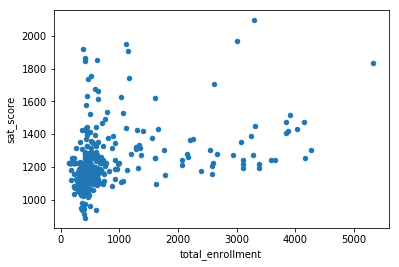

In [80]:
combined.plot.scatter(y='sat_score', x='total_enrollment')

## Findings

As noted above, total enrollment correlated poitively with SAT scores. 

# Plotting survey correlations

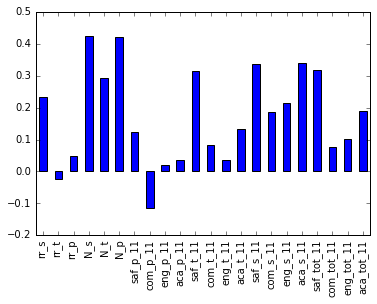

In [39]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")
correlations[survey_fields].plot.bar()

## Findings

A correlation greater than 0.25 (or lower than -0.25) is considered significant. It was surprising that the total enrollment was positively correlated to higher SAT scores. 

The following variables correlate with SAT scores:
N_s (Number of student respondents)
N_t (Number of teacher respondents)
N_p (Number of parent respondents)
Since these numbers are proportional to total enrollment, it makes sense that these numbers are positively correlated with SAT scores as well.  

Student and Teacher safety (saf_t_11 and saf_s_11 respectively) also correlated with SAT scores. A safer teaching environment likely provides better quality of education.

aca_s_11 (Student academic standards) correalted with SAT scores, however aca_t_11 (Teacher academic standards) did not.

# Exploring safety scores and SAT scores

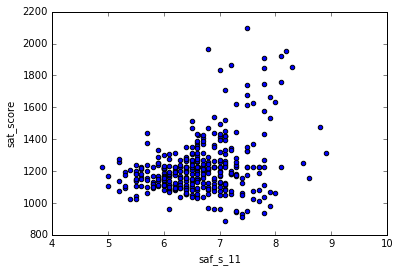

In [40]:
combined.plot.scatter(y='sat_score',x='saf_s_11')

## Findings

SAT scores have a weak correlation with safety scores. A SAT score of over 1600 was only seen in schools with a safety score of over 6.5. Some very high SAT scores were observed for regions with high safety scores. 

# Mapping safety scores by district


/home/user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


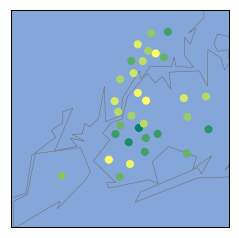

In [90]:
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
plt.show()

# Exploring race and SAT scores 

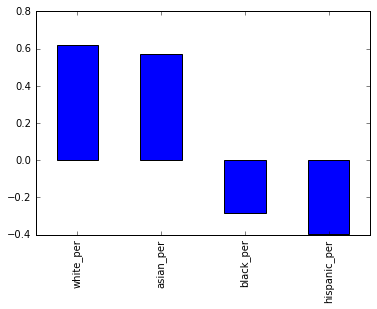

In [42]:
races = ["white_per", "asian_per", "black_per", "hispanic_per"]
correlations[races].plot.bar()

## Findings

Schools with a higher percentage of white and Asian people positively correlate with higher SAT scores, while a higher percentage of black and hispanic people correlates negatively with SAT scores. This may be due to lack of funding to schools in regions with higher black and hispanic populations. 

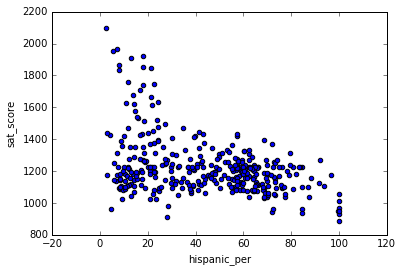

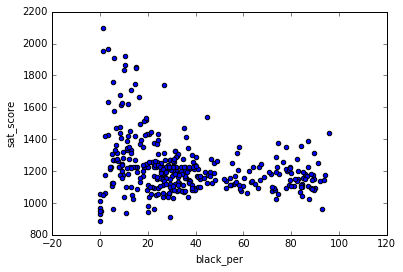

In [50]:
combined.plot.scatter(x='hispanic_per', y='sat_score')
combined.plot.scatter(x='black_per', y='sat_score')

In [54]:
majority_hispanic_schools = combined[combined["hispanic_per"] > 95]["SCHOOL NAME"]
print(majority_hispanic_schools)


223    ACADEMY FOR COLLEGE PREPARATION AND CAREER EXP...
235              MEDGAR EVERS COLLEGE PREPARATORY SCHOOL
236                             CLARA BARTON HIGH SCHOOL
237                           IT TAKES A VILLAGE ACADEMY
241                       VICTORY COLLEGIATE HIGH SCHOOL
331    PATHWAYS COLLEGE PREPARATORY SCHOOL: A COLLEGE...
Name: SCHOOL NAME, dtype: object


## Findings

Based on Google searches, these schools appear to be schools where English is not the primary medium of education. A lot of the students in these schools are learning English, which could be a factor in lower SAT scores. 

# Exploring gender and SAT scores

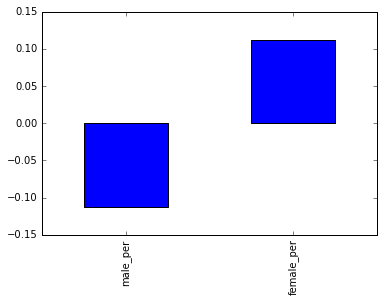

In [55]:
genders = ["male_per", "female_per"]
correlations[genders].plot.bar()

It appears that schools with a high percentage of females positively correlates weakly with high SAT scores, while schools with a high percentage of males negatively correlates weakly with high SAT scores. 

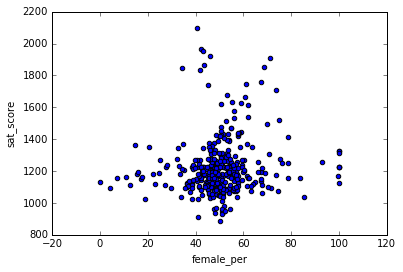

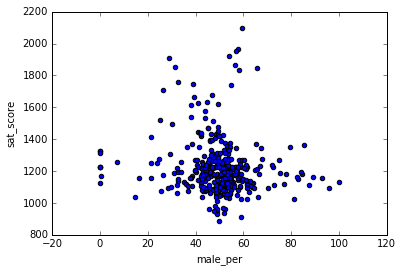

In [58]:
combined.plot.scatter(x='female_per', y='sat_score')
combined.plot.scatter(x='male_per', y='sat_score')

We can't really make any inferences based on these plots. high percentages of males or females don't seem to strongly correlate wwith high sAT scores.